In [41]:
import pandas as pd
import numpy as np
import pickle
from APIcall_v2 import main_api_call

ModuleNotFoundError: No module named 'APIcall_v2'

In [38]:
start_date, end_date, df_memory = main_api_call()

NameError: name 'main_api_call' is not defined

In [23]:
df= pd.read_csv('../data/processed/df_full.csv')
df.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,hours alternative.1,...,total km.5,km Z3-4.5,km Z5-T1-T2.5,hours alternative.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,hours alternative.6,Date
0,1,8.12,7.12,0.0,0.00,1.0,5.01,3.00,2.01,0.00,...,0.00,0.00,0.00,0.00,1.0,4.78,3.78,0.00,0.00,2024-06-23
1,0,0.00,0.00,0.0,1.31,1.0,8.12,7.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2024-06-24
2,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,1.31,...,17.44,15.44,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2024-06-25
3,1,5.00,4.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,7.11,7.11,0.00,0.00,1.0,17.44,15.44,0.00,0.00,2024-06-26
4,0,0.00,0.00,0.0,0.00,1.0,5.00,4.00,0.00,0.00,...,5.01,3.00,2.01,0.00,1.0,7.11,7.11,0.00,0.00,2024-06-27
5,1,5.08,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,8.12,7.12,0.00,0.00,1.0,5.01,3.00,2.01,0.00,2024-06-28
6,0,0.00,0.00,0.0,0.00,1.0,5.08,0.00,0.00,0.00,...,0.00,0.00,0.00,1.31,1.0,8.12,7.12,0.00,0.00,2024-06-29
7,1,9.08,5.08,2.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.31,2024-06-30
8,1,12.66,9.66,0.0,0.00,1.0,9.08,5.08,2.00,0.00,...,5.00,4.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2024-07-01
9,0,0.00,0.00,0.0,0.00,1.0,12.66,9.66,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,5.00,4.00,0.00,0.00,2024-07-02


In [24]:
def normalize_user(row, mean_df, std_df):
    mu = mean_df
    su = std_df
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd_user(data):
    mean = data.mean()
    std = data.std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

user_test_means, user_test_std = getMeanStd_user(df.copy())


# 4. Apply normalization to the *test data* using the *training* statistics
# X_test_normalized = X_test_original.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
# X_test_normalized = X_test_normalized.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
user_normalized = df.apply(lambda x: normalize_user(x, user_test_means,user_test_std), axis=1)
user_normalized = user_normalized.drop(columns=[ 'Date'], errors='ignore')


C:\Users\milo\AppData\Local\Temp\ipykernel_20636\935401076.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\milo\AppData\Local\Temp\ipykernel_20636\935401076.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


In [31]:
# import the model
with open('../models/logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)
# make predictions
predictions = model.predict(user_normalized)
# make probability predictions
probs = model.predict_proba(user_normalized)[:, 1]




In [32]:
# create a df of predictions using the date column from dfday_user and the predictions

df['injury predictions'] = predictions
df['injury probabilities'] = probs
df[['Date','injury predictions','injury probabilities']].head(30)

,Date,injury predictions,injury probabilities
0,2024-06-23,0,0.459921
1,2024-06-24,0,0.459921
2,2024-06-25,1,0.701126
3,2024-06-26,1,0.596003
4,2024-06-27,0,0.480978
5,2024-06-28,1,0.591211
6,2024-06-29,0,0.176567
7,2024-06-30,0,0.459921
8,2024-07-01,0,0.430931
9,2024-07-02,0,0.430931


([<matplotlib.axis.XTick at 0x26f84bdfcd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

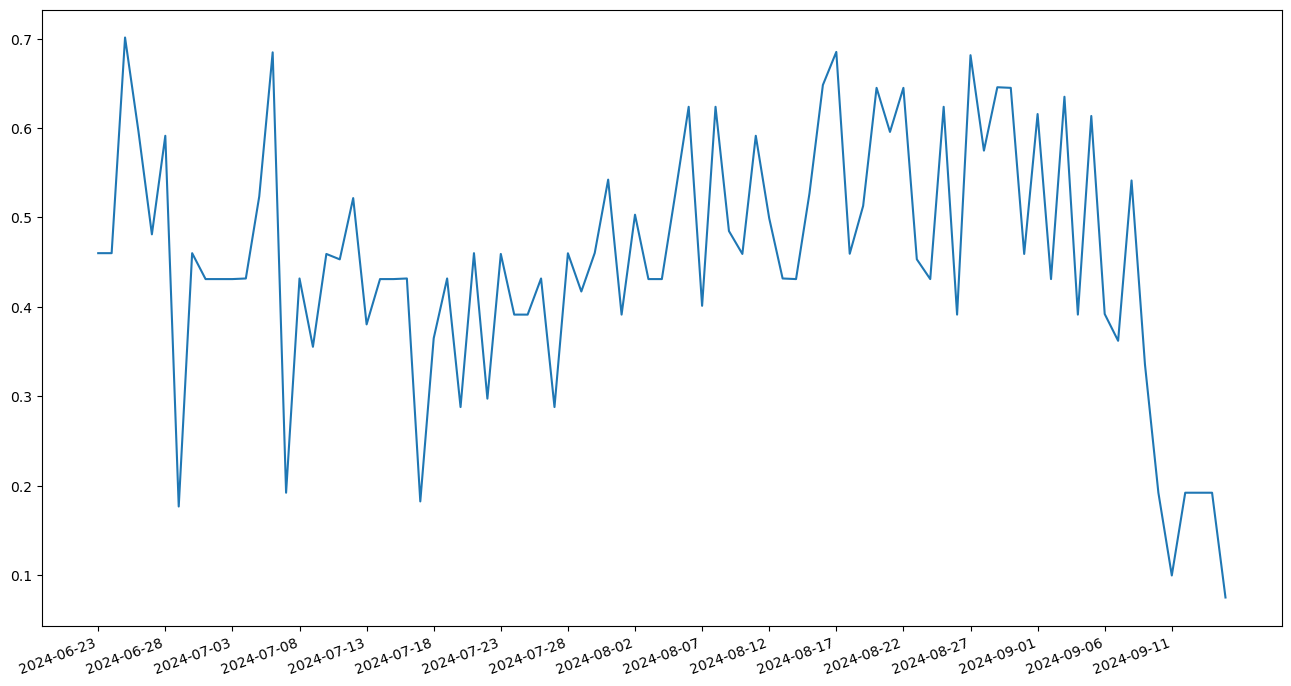

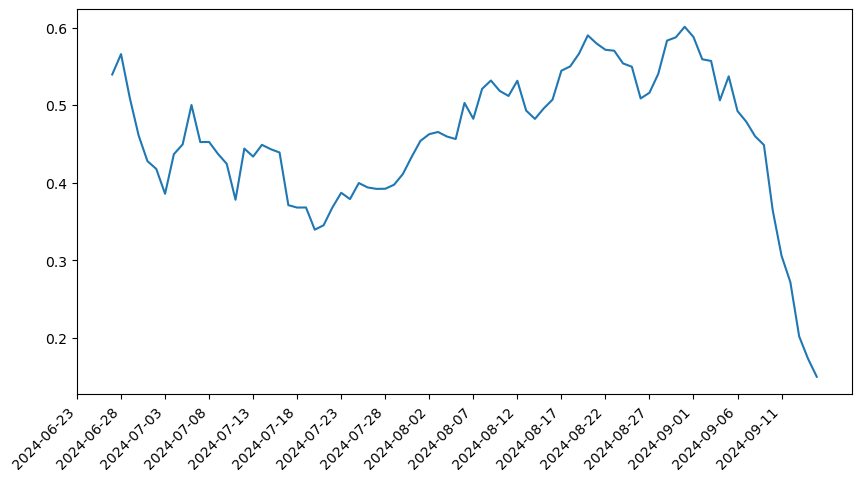

In [ ]:
# plot the probabilities over time
import matplotlib.pyplot as plt
# add a colour gradient to the plot based on the injury probabilities -red is high, blue is low

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# add a colour gradient to the background based on the x axis -red is high, blue is low, with adjustable transparency
cmap = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=1)



plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['injury probabilities'])
# fix the date axis titles to use every 3rd date in the format mm/dd
# select the last 5 chars of the date string to get the mm/dd format
plt.xticks(df['Date'][::5], rotation=20, ha='right')
# plot the probabilities over time with a rolling mean
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['injury probabilities'].rolling(window=5).mean())
plt.xticks(df['Date'][::5], rotation=45, ha='right')